In [1]:
HEAD_PATH = "../"

In [2]:
import warnings
 
warnings.filterwarnings('ignore')

- path of data

- Welcome to Quantitative and High Frequency Trading Training Program
- Let's start with basic data analysis with python
- you can use Shift+Enter to run each line of code

- path of our program

In [3]:
DATA_PATH = HEAD_PATH + "/stock_pkl/"

- set working directory

In [4]:
import os
os.chdir(DATA_PATH)

In [5]:
os.chdir(DATA_PATH)

- number of cores

In [7]:
#CORE_NUM = int(os.environ['NUMBER_OF_PROCESSORS'])
CORE_NUM = 12


- get working directory

In [8]:
os.getcwd()

'/Users/junsu/Dropbox/workspace/stock2nd/stock_pkl'

- sample product, you can change to your specific product symbol
- for this quarter we analyze all of the black medals

In [9]:
product_list = ["600519", "000858", "000568", "600809", "002304"]
product = product_list[0]

- directory of the product's data

In [10]:
dire = DATA_PATH + product
dire

'..//stock_pkl/600519'

- get all available data

In [11]:
all_dates = list(map(lambda x: x,os.listdir(DATA_PATH + product)))
len(all_dates)
## 11

11

- we can see that there are 974 days
- all of the products have the same trading days
- so we just take a as an example
- get first several dates

- specify a date

In [12]:
date = "2018"

- loading data set

In [13]:
import pandas as pd
import numpy as np
import math
import _pickle as cPickle
import gzip

with gzip.open(dire+"/"+date+".pkl", 'rb', compresslevel=1) as file_object:
    raw_data = file_object.read()
data = cPickle.loads(raw_data)

- get the column names of data

In [14]:
data.columns

#Index(['date.time', 'price', 'traded.num', 'turnover', 'qty', 'bid1', 'bid2',
#       'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
#       'bid1.qty', 'bid2.qty', 'bid3.qty', 'bid4.qty', 'bid5.qty', 'ask1.qty',
#       'ask2.qty', 'ask3.qty', 'ask4.qty', 'ask5.qty', 'adjust'],
#      dtype='object')

Index(['date.time', 'price', 'traded.num', 'turnover', 'qty', 'bid1', 'bid2',
       'bid3', 'bid4', 'bid5', 'ask1', 'ask2', 'ask3', 'ask4', 'ask5',
       'bid1.qty', 'bid2.qty', 'bid3.qty', 'bid4.qty', 'bid5.qty', 'ask1.qty',
       'ask2.qty', 'ask3.qty', 'ask4.qty', 'ask5.qty', 'adjust', 'wpr',
       'next.bid', 'next.ask', 'wpr.ret', 'ret', 'min.4096', 'max.4096'],
      dtype='object')

In [15]:
data.head(3).to_csv("head3_2018.csv")

In [16]:
data.iloc[0:10,0:10]

#  	date.time 	price 	traded.num 	turnover 	qty 	bid1 	bid2 	bid3 	bid4 	bid5
# 0 	2018-01-02 09:25:01 	700.00 	152 	22776600.0 	325 	700.00 	699.99 	699.98 	699.90 	699.80
# 1 	2018-01-02 09:30:00 	701.29 	25 	23459540.0 	335 	700.90 	700.01 	700.00 	699.99 	699.98
# 2 	2018-01-02 09:30:02 	701.30 	56 	7309588.0 	104 	701.30 	701.10 	701.00 	700.99 	700.90
# 3 	2018-01-02 09:30:06 	702.00 	34 	3897012.0 	56 	702.00 	701.89 	701.59 	701.48 	701.30
# 4 	2018-01-02 09:30:09 	703.00 	7 	1897088.0 	27 	702.25 	702.00 	701.99 	701.49 	701.48
# 5 	2018-01-02 09:30:12 	702.50 	4 	351200.0 	5 	702.50 	702.25 	702.00 	701.99 	701.90
# 6 	2018-01-02 09:30:15 	703.00 	6 	421588.0 	6 	702.90 	702.50 	702.43 	702.00 	701.99
# 7 	2018-01-02 09:30:18 	703.00 	10 	1335568.0 	19 	702.90 	702.50 	702.43 	702.00 	701.99
# 8 	2018-01-02 09:30:21 	703.05 	7 	729680.0 	10 	703.05 	703.01 	703.00 	702.90 	702.50
# 9 	2018-01-02 09:30:24 	703.00 	15 	1132036.0 	16 	703.05 	703.00 	702.99 	702.90 	702.54

,date.time,price,traded.num,turnover,qty,bid1,bid2,bid3,bid4,bid5
0,2018-01-02 09:25:01,700.00,152,22776600.0,325,700.00,699.99,699.98,699.90,699.80
1,2018-01-02 09:30:00,701.29,25,23459540.0,335,700.90,700.01,700.00,699.99,699.98
2,2018-01-02 09:30:02,701.30,56,7309588.0,104,701.30,701.10,701.00,700.99,700.90
3,2018-01-02 09:30:06,702.00,34,3897012.0,56,702.00,701.89,701.59,701.48,701.30
4,2018-01-02 09:30:09,703.00,7,1897088.0,27,702.25,702.00,701.99,701.49,701.48
5,2018-01-02 09:30:12,702.50,4,351200.0,5,702.50,702.25,702.00,701.99,701.90
6,2018-01-02 09:30:15,703.00,6,421588.0,6,702.90,702.50,702.43,702.00,701.99
7,2018-01-02 09:30:18,703.00,10,1335568.0,19,702.90,702.50,702.43,702.00,701.99
8,2018-01-02 09:30:21,703.05,7,729680.0,10,703.05,703.01,703.00,702.90,702.50
9,2018-01-02 09:30:24,703.00,15,1132036.0,16,703.05,703.00,702.99,702.90,702.54


In [17]:
data.iloc[0:10,10:20]

# ask1 	ask2 	ask3 	ask4 	ask5 	bid1.qty 	bid2.qty 	bid3.qty 	bid4.qty 	bid5.qty
# 0 	700.04 	701.00 	701.30 	701.47 	702.00 	84 	5 	1 	7 	5
# 1 	701.29 	701.80 	701.90 	702.00 	702.18 	1 	46 	100 	5 	1
# 2 	701.89 	703.00 	703.43 	703.97 	704.00 	95 	1 	47 	1 	1
# 3 	702.50 	702.88 	703.00 	703.28 	703.43 	108 	3 	1 	1 	124
# 4 	703.00 	703.28 	703.43 	703.50 	703.90 	1 	110 	1 	1 	1
# 5 	702.90 	703.00 	703.28 	703.43 	703.50 	34 	3 	108 	1 	4
# 6 	703.00 	703.28 	703.43 	703.50 	703.90 	1 	35 	7 	108 	1
# 7 	702.99 	703.00 	703.28 	703.43 	703.50 	136 	35 	7 	109 	1
# 8 	703.28 	703.43 	703.50 	703.90 	703.97 	125 	1 	2 	2 	35
# 9 	703.90 	703.97 	704.00 	704.18 	704.43 	3 	4 	1 	1 	2

# # data.iloc[0:10,20:]

,ask1,ask2,ask3,ask4,ask5,bid1.qty,bid2.qty,bid3.qty,bid4.qty,bid5.qty
0,700.04,701.00,701.30,701.47,702.00,84,5,1,7,5
1,701.29,701.80,701.90,702.00,702.18,1,46,100,5,1
2,701.89,703.00,703.43,703.97,704.00,95,1,47,1,1
3,702.50,702.88,703.00,703.28,703.43,108,3,1,1,124
4,703.00,703.28,703.43,703.50,703.90,1,110,1,1,1
5,702.90,703.00,703.28,703.43,703.50,34,3,108,1,4
6,703.00,703.28,703.43,703.50,703.90,1,35,7,108,1
7,702.99,703.00,703.28,703.43,703.50,136,35,7,109,1
8,703.28,703.43,703.50,703.90,703.97,125,1,2,2,35
9,703.90,703.97,704.00,704.18,704.43,3,4,1,1,2


In [18]:
data.iloc[0:10,20:]

# ask1.qty 	ask2.qty 	ask3.qty 	ask4.qty 	ask5.qty 	adjust
# 0 	1 	2 	50 	1 	3 	1.530971
# 1 	5 	1 	11 	3 	1 	1.530971
# 2 	4 	28 	1 	1 	31 	1.530971
# 3 	20 	1 	21 	1 	1 	1.530971
# 4 	15 	1 	1 	2 	8 	1.530971
# 5 	1 	15 	1 	1 	2 	1.530971
# 6 	14 	1 	1 	2 	8 	1.530971
# 7 	1 	4 	1 	1 	2 	1.530971
# 8 	1 	1 	2 	8 	1 	1.530971
# 9 	8 	1 	32 	1 	12 	1.530971

,ask1.qty,ask2.qty,ask3.qty,ask4.qty,ask5.qty,adjust,wpr,next.bid,next.ask,wpr.ret,ret,min.4096,max.4096
0,1,2,50,1,3,1.530971,1071.740430,700.90,701.29,0.000000,0.000000,1071.74043,1071.74043
1,5,1,11,3,1,1.530971,1073.157299,701.30,701.89,1.416869,0.001321,1071.74043,1071.74043
2,4,28,1,1,31,1.530971,1074.536951,702.00,702.50,1.379653,0.001285,1071.74043,1071.74043
3,20,1,21,1,1,1.530971,1075.387733,702.25,703.00,0.850781,0.000791,1071.74043,1071.74043
4,15,1,1,2,8,1.530971,1075.196361,702.50,702.90,-0.191371,-0.000178,1071.74043,1071.74043
5,1,15,1,1,2,1.530971,1076.102231,702.90,703.00,0.905870,0.000842,1071.74043,1071.74043
6,14,1,1,2,8,1.530971,1076.129935,702.90,702.99,0.027703,0.000026,1071.74043,1071.74043
7,1,4,1,1,2,1.530971,1076.256510,703.05,703.28,0.126575,0.000118,1071.74043,1071.74043
8,1,1,2,8,1,1.530971,1076.698703,703.05,703.90,0.442193,0.000411,1071.74043,1071.74043
9,8,1,32,1,12,1.530971,1076.704281,703.30,703.89,0.005578,0.000005,1071.74043,1071.74043


- plot the price

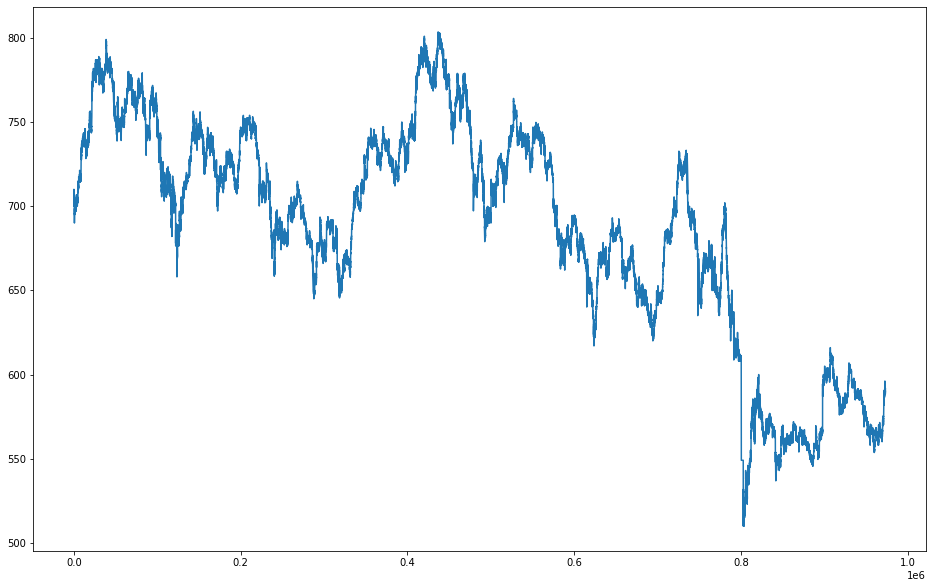

In [19]:
# pip install plotly
import matplotlib.pyplot as plt

plt.figure(1, figsize=(16, 10))
plt.plot(data["price"].values);

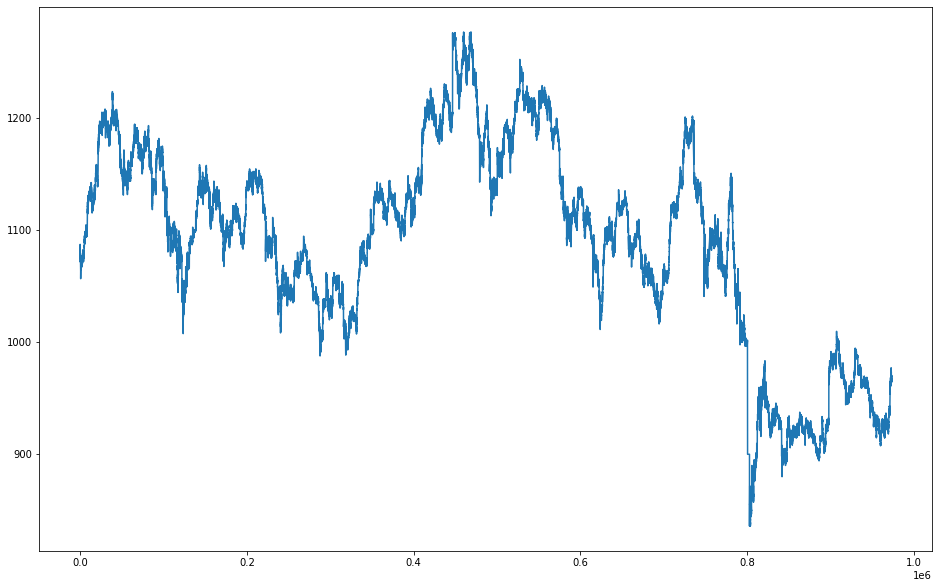

In [20]:
plt.figure(1, figsize=(16, 10))
plt.plot(data["price"]*data["adjust"]);

In [21]:
data["date.time"]

0         2018-01-02 09:25:01
1         2018-01-02 09:30:00
2         2018-01-02 09:30:02
3         2018-01-02 09:30:06
4         2018-01-02 09:30:09
                 ...         
973172    2018-12-28 14:56:48
973173    2018-12-28 14:56:51
973174    2018-12-28 14:56:54
973175    2018-12-28 14:56:57
973176    2018-12-28 15:00:00
Name: date.time, Length: 973177, dtype: object

- plot price change

In [22]:
def load(path):
    with gzip.open(path, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    return cPickle.loads(raw_data)

In [23]:
import sys
print(sys.executable)


/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8


In [24]:
import functools
import dask

In [25]:
from dask import compute, delayed
def parLapply(CORE_NUM, iterable, func, *args, **kwargs):
    with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
        f_par = functools.partial(func, *args, **kwargs)
        result = compute([delayed(f_par)(item) for item in iterable])[0]
    return result

In [26]:
def save(data, path):
    serialized = cPickle.dumps(data)
    with gzip.open(path, 'wb', compresslevel=1) as file_object:
        file_object.write(serialized)

In [27]:
def addWpr(date, product):
    data = load(DATA_PATH+"/"+product+"/"+date)
    data["wpr"] = (data["bid1"]*data["ask1.qty"]+data["ask1"]*data["bid1.qty"])/(data["bid1.qty"]+data["ask1.qty"])
    outlier = (data["bid1"]<1e-6) | (data["ask1"]<1e-6) | (np.isnan(data["wpr"]))
    data["wpr"][outlier] = data["price"][outlier]
    data["next.bid"] = data["bid1"].shift(-1)
    data["next.ask"] = data["ask1"].shift(-1)
    data["wpr"] = data["wpr"]*data["adjust"]
    data["wpr.ret"] = data["wpr"]-data["wpr"].shift(1)
    data["wpr.ret"][0] = 0
    data["ret"] = np.log(data["wpr"]) - np.log(data["wpr"]).shift(1)
    data["ret"][0] = 0
    save(data, DATA_PATH+"/"+product+"/"+date)

In [28]:
CORE_NUM = 4

In [29]:
%%time
for product in product_list:
    result = parLapply(CORE_NUM, all_dates, addWpr, product=product)
;

## Wall time: 1min 23s

CPU times: user 85.7 ms, sys: 89.8 ms, total: 176 ms
Wall time: 46.8 s


''

In [30]:
product = product_list[0]
data = load(DATA_PATH+"/"+product+"/"+"2018.pkl")

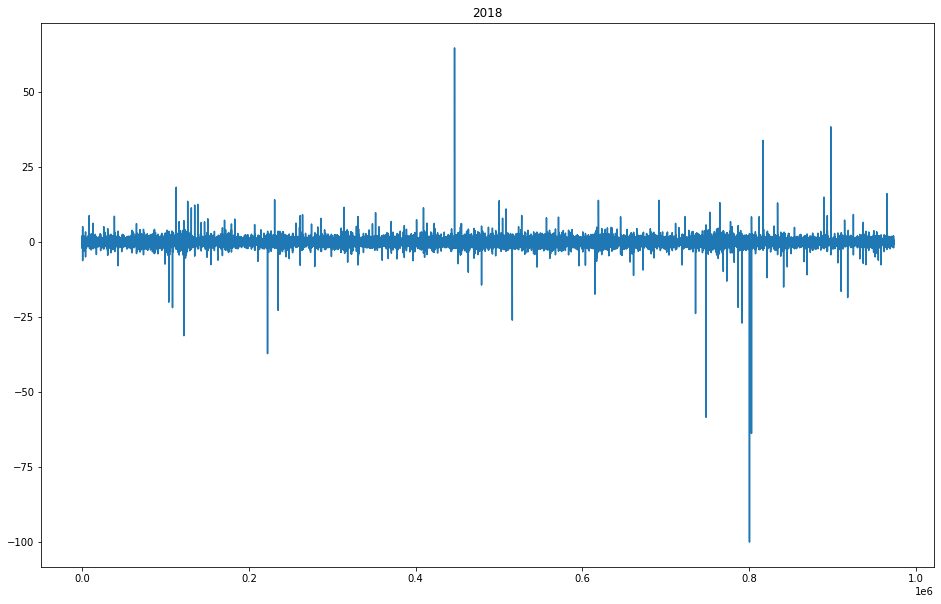

In [31]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
data["wpr.ret"].values[0]=0
plt.plot(data["wpr.ret"].values);

- plot price log return

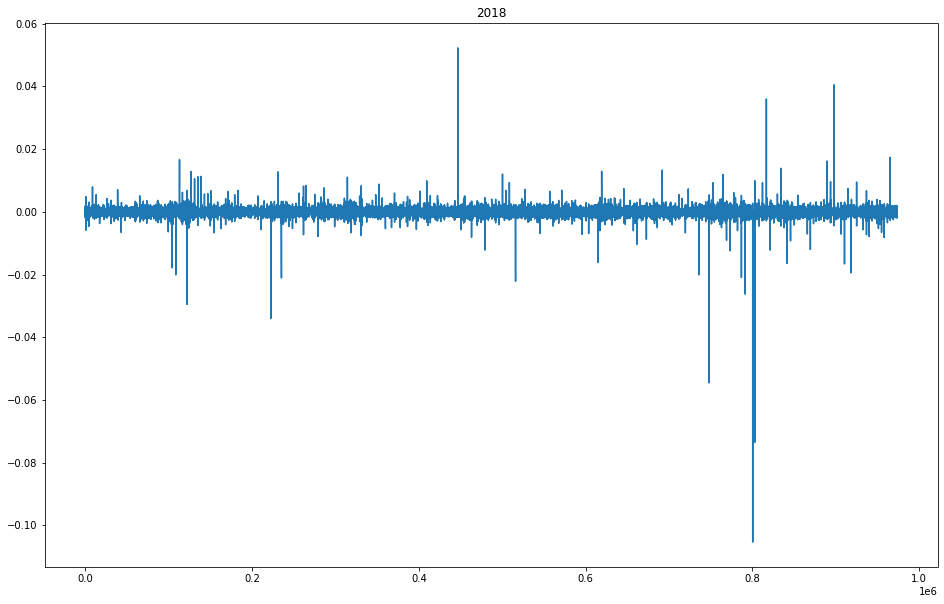

In [32]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(data["ret"].values);

- count the number of rising ticks

In [62]:
sum(data['ret']>0)/len(data)
## 0.4818650666836557

0.4818650666836557

- count the number of falling ticks

In [63]:
sum(data['ret']<0)/len(data)
## 0.4854687276826312

0.4854687276826312

In [64]:
sum(data['ret']==0)/len(data)
## 0.032666205633713086

0.032666205633713086

- count the number of total ticks

In [65]:
len(data)
## 973177

973177

- formula to calculate wpr:

In [33]:
wpr = (data["bid1"]*data["ask1.qty"]+data["ask1"]*data["bid1.qty"])/(data["bid1.qty"]+data["ask1.qty"])

- upper limit or lower limit

In [34]:
limit = (data["ask1"]<1e-6) | (data["bid1"]<1e-6)

- in this case, one of bid and ask price is zero, so using newest price as wpr

In [35]:
wpr[limit] = data["price"][limit]

In [36]:
wpr = wpr*data["adjust"]

In [37]:
wpr.head()

# 0    1071.740430
# 1    1073.157299
# 2    1074.536951
# 3    1075.387733
# 4    1075.196361
# dtype: float64



0    1071.740430
1    1073.157299
2    1074.536951
3    1075.387733
4    1075.196361
dtype: float64

In [38]:
data["wpr"].head()

# 0    1071.740430
# 1    1073.157299
# 2    1074.536951
# 3    1075.387733
# 4    1075.196361
# Name: wpr, dtype: float64


0    1071.740430
1    1073.157299
2    1074.536951
3    1075.387733
4    1075.196361
Name: wpr, dtype: float64

In [39]:
sum(abs(wpr - data["wpr"]) > 0.00000001)
## 0

0

- stationary test for return series

- load related package

In [40]:
import statsmodels.tsa.stattools as ts

In [41]:
result = ts.adfuller(data["ret"], maxlag=int(pow(len(data["ret"])-1,(1/3))), regression='ct', autolag=None)
result

# (-98.75770074233702,
#  0.0,
#  99,
#  973077,
#  {'1%': -3.958779303610315,
#   '5%': -3.4104945118827037,
#   '10%': -3.127052657142275})

## for this test the smaller the value the more stationary it is
## so it's stationary

(-98.75770074230448,
 0.0,
 99,
 973077,
 {'1%': -3.958779303610315,
  '5%': -3.4104945118827037,
  '10%': -3.127052657142275})

In [42]:
result = ts.kpss(data["ret"], regression='c', lags=int(3*math.sqrt(len(data["ret"]))))
result
                 
# (0.0805796450417109,
#  0.1,
#  2959,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})                                                 
                                                                   
                                                                    

    ## for KPSS test, small value means level stationary, large value means trend
    ## its p-value is 0.1 so it's stationary

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.08057964504171097,
 0.1,
 2959,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- get price movements of 120 ticks, it's about 1 minute

In [43]:
ret_120 = (data["ret"].rolling(120).sum()).dropna().reset_index(drop=True)

- check correctness

In [44]:
sum(data["ret"][0:120])
## 0.012025016962694757

0.012025016962694757

In [45]:
ret_120.iloc[0]
## 0.003527416579581555

0.012025016962694757

- plot the price movements of 120 ticks

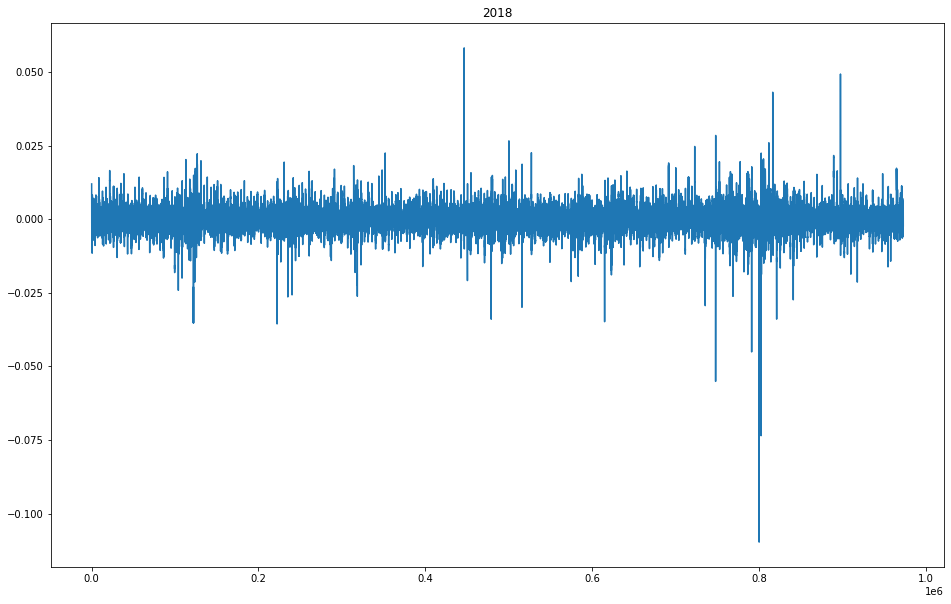

In [46]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_120.values);

In [47]:
len(ret_120)
## 973058

973058

In [48]:
len(data)
## 973177

973177

In [49]:
range_120 = ((np.mod(np.arange(0, len(data)),120)==0))[119:]

In [50]:
len(ret_120)
## 973058

973058

In [51]:
ret_120.iloc[np.where(range_120)]

# 1         0.011938
# 121      -0.002639
# 241      -0.006374
# 361       0.000672
# 481      -0.003883
#             ...   
# 972481    0.001465
# 972601   -0.001267
# 972721   -0.004536
# 972841   -0.004767
# 972961    0.005754
# Name: ret, Length: 8109, dtype: float64

1         0.011938
121      -0.002639
241      -0.006374
361       0.000672
481      -0.003883
            ...   
972481    0.001465
972601   -0.001267
972721   -0.004536
972841   -0.004767
972961    0.005754
Name: ret, Length: 8109, dtype: float64

- test whether ret.120 is stationary

In [52]:
result = ts.adfuller(ret_120.iloc[np.where(range_120)], maxlag=int(pow(len(ret_120.iloc[np.where(range_120)])-1,(1/3))), regression='ct', autolag=None)
result

# (-17.720699767515875,
#  0.0,
#  20,
#  8088,
#  {'1%': -3.95988975975366,
#   '5%': -3.411032967099939,
#   '10%': -3.1273697435248473})

(-17.72069976753746,
 0.0,
 20,
 8088,
 {'1%': -3.95988975975366,
  '5%': -3.411032967099939,
  '10%': -3.1273697435248473})

In [53]:
result = ts.kpss(ret_120.iloc[np.where(range_120)], regression='c', lags=int(3*math.sqrt(len(ret_120.iloc[np.where(range_120)]))/13))
result

# (0.08180242830810695,
#  0.1,
#  20,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

## it's still stationary

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.08180242830810697,
 0.1,
 20,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can check longer period

In [54]:
ret_2000 = (data["ret"].rolling(2000).sum()).dropna().reset_index(drop=True)

- plot the price change

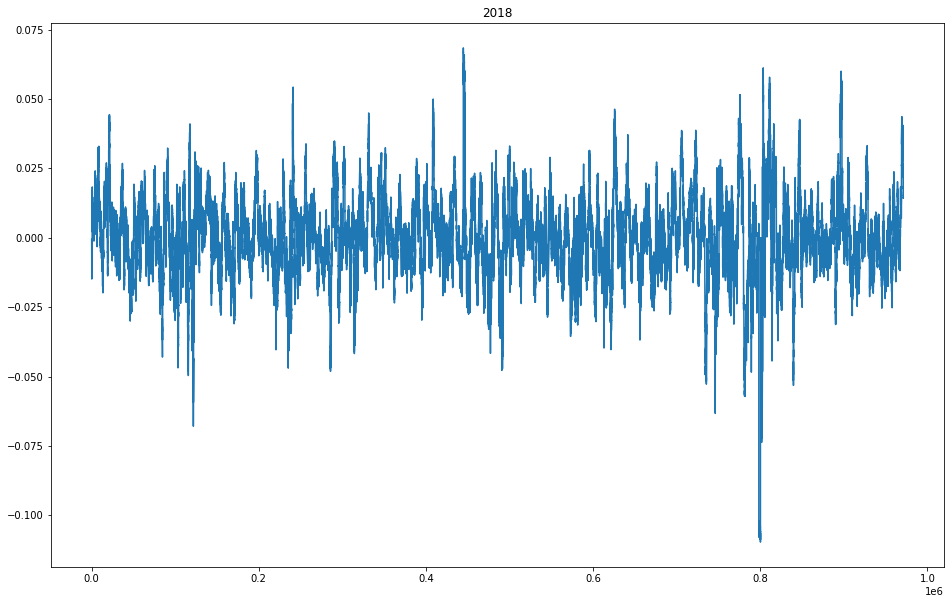

In [55]:
plt.figure(1, figsize=(16, 10))
plt.title(date)
plt.plot(ret_2000.values);

In [56]:
sum((np.mod(np.arange(1, len(data)+1),2000)==0))
## 486

486

- So there are too few points to test for stationary

In [57]:
import pandas as pd
import _pickle as cPickle
import gzip

- there may be too few data
- we can check for more days

In [58]:
def get_sample_ret(date, period):
    data = load(DATA_PATH + product+"/"+date)
    ret = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    range = ((np.mod(np.arange(0, len(data)),period)==0))[(period-1):]
    return ret.iloc[np.where(range)]


In [59]:
%%time
result = parLapply(CORE_NUM, all_dates, get_sample_ret, period=4096)
;

# Wall time: 7.76 s

CPU times: user 21.1 ms, sys: 23.8 ms, total: 44.8 ms
Wall time: 4.05 s


''

In [60]:
from itertools import chain 

In [61]:
ret_long = list(chain.from_iterable(result)) 

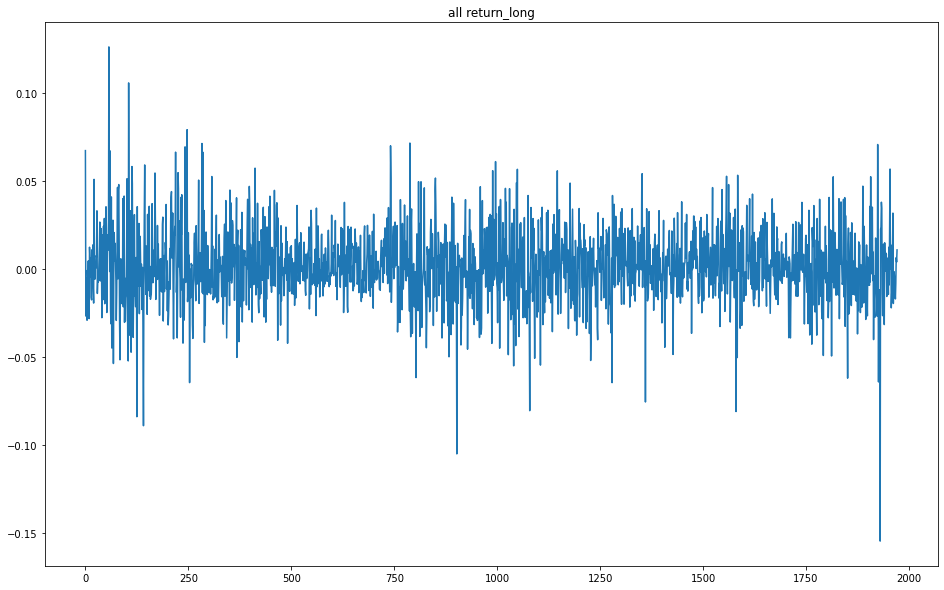

In [62]:
plt.figure(1, figsize=(16, 10))
plt.title("all return_long")
plt.plot(ret_long);

In [63]:
result = ts.adfuller(ret_long, maxlag=int(pow(len(ret_long)-1,(1/3))), regression='ct', autolag=None)
result

# (-11.956867152061653,
#  4.513188081085745e-19,
#  12,
#  1959,
#  {'1%': -3.963398711813558,
#   '5%': -3.412733504022824,
#   '10%': -3.128370882799846})

## it's still stationary

(-11.867749104247347,
 6.322880253577911e-19,
 12,
 1959,
 {'1%': -3.963398711813558,
  '5%': -3.412733504022824,
  '10%': -3.128370882799846})

In [64]:
result = ts.kpss(ret_long, regression='c', lags=int(3*math.sqrt(len(ret_long))/13))
result

# (0.21304537820127364,
#  0.1,
#  10,
#  {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

# ## p-value is 0.1 so it's stationary

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:1910: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warnings.warn(


(0.15219000970470134,
 0.1,
 10,
 {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739})

- we can see that, it's still stationary for 4096 ticks


- check simple strategy


- set triger threshold

In [65]:
threshold = 0.001
len(ret_long)
# 1972

1972


- make up the return series to match uo with original data

- plot price series

- number of ticks above the threshold, to be long position

In [66]:
sum(np.array(ret_long)>threshold)
## 957

957

- number of ticks below negetive threshold, to be short position

In [67]:
sum(np.array(ret_long)< -threshold)
## 910

910

- set position


- number of ticks

## ############## The following part is bad example of trading ##########

- set position just the sanme as signal

In [68]:
## backtest method: signal value decides position
from collections import OrderedDict
def get_daily_pnl_fast(date, product="rb", period=4096, threshold=0.001, buy_tranct=1.5e-4, sell_tranct=11.5e-4, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data) ## original data
    n_bar = len(data)  ## number of bars
    unit = np.std(data["ret"]) ## standard deviation of return
    np.random.seed(10)
    ##  we repeat the above code to get daily result
    ret_long = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True) ## future return, used as signal
    ret_long = ret_long.append(pd.Series([0]*(len(data)-len(ret_long)))).reset_index(drop=True)
    signal = pd.Series([0] * n_bar)
    signal[(ret_long>threshold) & (np.array(data["next.ask"])>0)] = 1 ## signal>thre, position =1
    signal[(ret_long< -threshold) & (np.array(data["next.bid"])>0)] = -1 ## signal< -thre, position = -1
    position=signal
    position[0]=0
    position[n_bar-1] = 0 ## close position before the end of day
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = np.zeros(n_bar)
    change_buy = np.array(change_pos>0)
    change_sell = np.array(change_pos<0)
    change_base[change_buy] = data["next.ask"][change_buy]*(1+buy_tranct) ## buy price, use next ask, tranct cost use notional*ratio
    change_base[change_sell] = data["next.bid"][change_sell]*(1-sell_tranct) ## sell price use next bid
    raw_pnl = -(change_base*change_pos).cumsum()+position*data["price"]
    date = np.array([x[0:10] for x in data["date.time"]])
    next_date = np.append(date[1:],'1')
    end_day = date!=next_date
    final_pnl = -sum(change_base*change_pos) ## total pnl, there is a negative sign, because selling get money and buying pay money
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0)) ## number of trades
    hld_period = sum(position!=0)   ## holding period
    daily_pnl = raw_pnl[end_day].reset_index(drop=True)
    pnl = np.append(daily_pnl[0], np.diff(daily_pnl))
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date[end_day]), ("pnl", pnl),
                          ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we try one day as an example

In [69]:
dire+"/"+all_dates[0]

'..//stock_pkl/600519/2015.pkl'

- Then we use it for all days

In [76]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=1):
    f_par = functools.partial(get_daily_pnl_fast, product=product_list[0], period=4096, threshold=0.001, noise=0)
result = compute([delayed(f_par)(date) for date in all_dates])[0]
    
# Wall time: 35.2 s

CPU times: user 16.8 s, sys: 6.78 s, total: 23.6 s
Wall time: 15.4 s


- Now we can use a function to check its performance

In [77]:
from collections import OrderedDict
def get_performance(result, spread=1):
    date = []
    pnl = []
    num = 0
    hld = 0
    for i in range(len(result)):
        date = np.append(date, result[i]["date"])
        pnl = np.append(pnl, result[i]["pnl"])
        num += result[i]["num"]
        hld += result[i]["hld.period"]
    date_format = [pd.to_datetime(d) for d in date]
    plt.figure(1, figsize=(16, 10))
    plt.title("")
    plt.xlabel("date")
    plt.ylabel("pnl")
    plt.plot(date_format, pnl.cumsum())
    n_days = len(date)
    if num==0:
        return;
    if (pnl.std()==0):
        sharpe = 0
    else:
        sharpe = pnl.mean()/pnl.std()*math.sqrt(250)
    pnl_pd = pd.Series(pnl.cumsum())
    drawdown = max(pnl_pd.cummax()-pnl_pd)/pnl_pd.iloc[-1]
    mar = 1/drawdown
    win_ratio = sum(pnl>0)/n_days
   
    avg_pnl = sum(pnl)/num
    hld_period = hld/num
    return OrderedDict([("sharpe", sharpe), ("drawdown", drawdown), ("mar", mar), ("win.ratio", win_ratio)
                        , ("num", num/n_days), ("avg.pnl", avg_pnl), ("hld.period", hld_period)])

,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-5.807688,-0.999864,-1.000136,0.308607,21.703689,-0.732229,144.721944


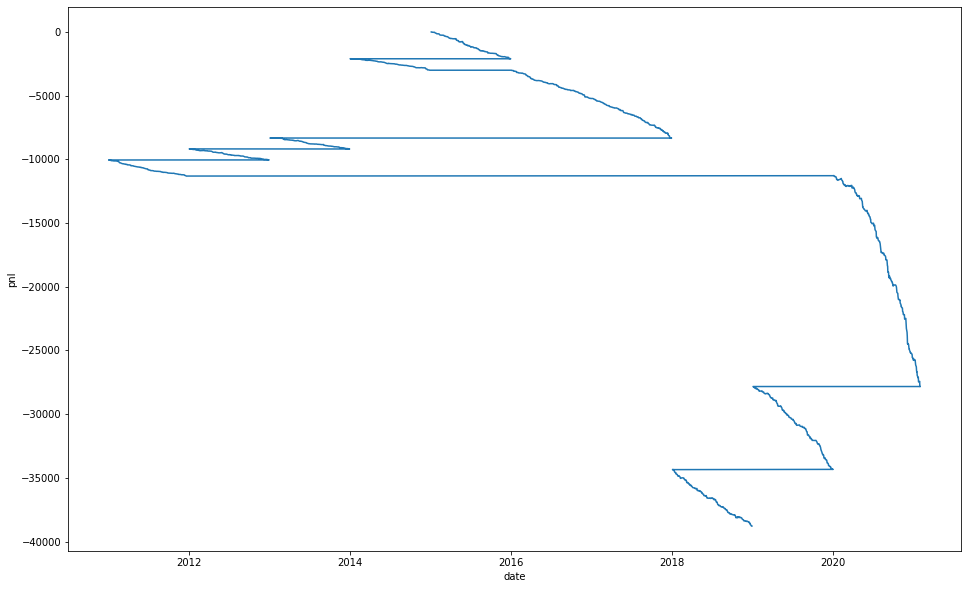

In [78]:
pd.DataFrame(get_performance(result, 1), index=[0])

#  	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 	-5.807688 	-0.999908 	-1.000092 	0.308607 	21.703689 	-0.732229 	144.721944


- we can see it's really bad
- we can try increasing threshold

In [109]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product=product_list[0], period=4096, threshold=0.01,  noise=0)
result_2 = compute([delayed(f_par)(date) for date in all_dates])[0]

#Wall time: 35.4 s

CPU times: user 16.4 s, sys: 6.55 s, total: 23 s
Wall time: 14.8 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-6.773244,-0.999921,-1.000079,0.215574,16.952459,-0.659888,110.695049


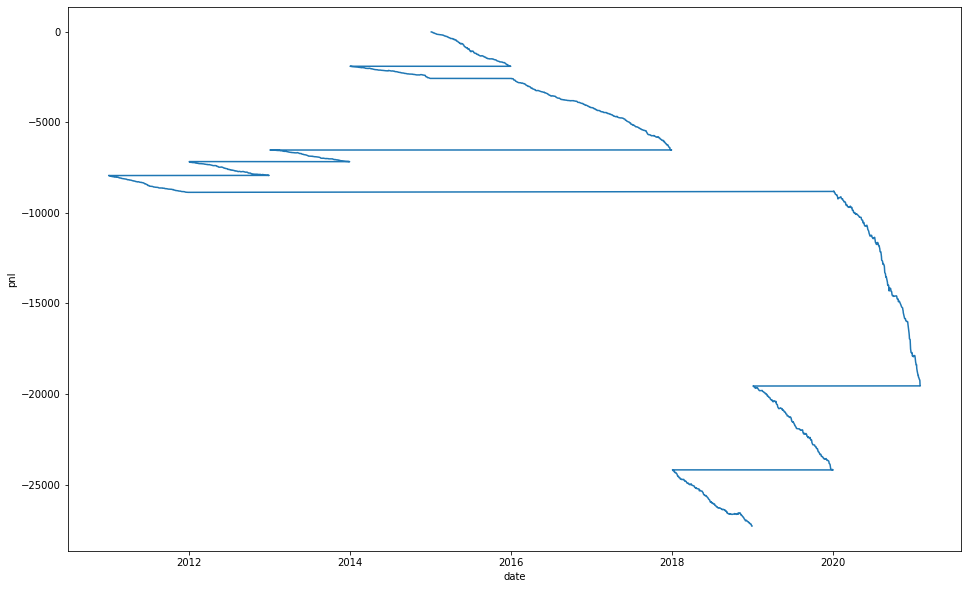

In [110]:
pd.DataFrame(get_performance(result_2), index=[0])


# 	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# -6.773244 	-0.999765 	-1.000235 	0.215574 	16.952459 	-0.659888 	110.695049

In [111]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl_fast, product=product_list[0], period=4096, threshold=0.02, noise=0)
result_3 = compute([delayed(f_par)(date) for date in all_dates])[0]

## Wall time: 35.2 s


CPU times: user 16.5 s, sys: 6.69 s, total: 23.2 s
Wall time: 15 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,-5.034499,-0.999688,-1.000312,0.168443,10.339754,-0.594999,92.146419


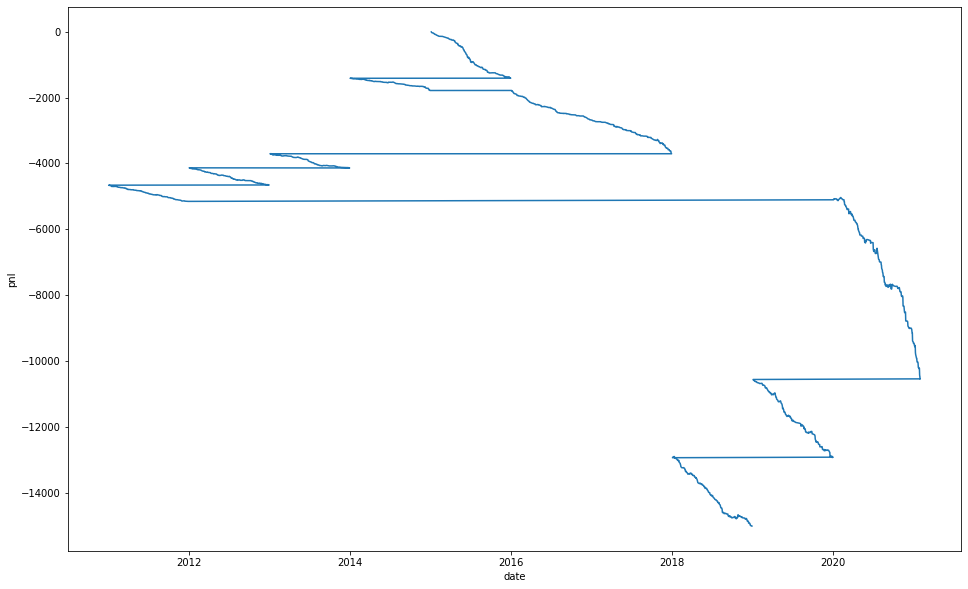

In [112]:
pd.DataFrame(get_performance(result_3, 1), index=[0])

#  	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 	-5.034499 	-0.999573 	-1.000427 	0.168443 	10.339754 	-0.594999 	92.146419

- Although it's profitable there are very few trades.
- Now we use a different scheme.
- In previous scheme, we close our position when the value is not strong enough.
- It may close the positions too soon that it cannot cover transaction cost on average
- So we change our backtest method to make it holding positions longer

In [113]:
## backtest use good method
from collections import OrderedDict
def get_daily_pnl(date, product="rb", period=2000, threshold=0.001, buy_tranct=1.5e-4, sell_tranct=11.5e-4, noise=0):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data)
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    noise_ret = np.random.normal(scale=unit*noise, size=n_bar)
    ##  we repeat the above code to get daily result
    ret_2000 = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_2000 = ret_2000.append(pd.Series([0]*(len(data)-len(ret_2000)))).reset_index(drop=True) + noise_ret
    signal = pd.Series([0] * n_bar)
    signal[ret_2000>threshold] = 1 #
    signal[ret_2000< -threshold] = -1
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1## if signal==1, position_pos=1
    position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0  ## if ret< -threshold, position_pos=0
    position_pos.ffill(inplace=True)
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1 ## if signal==-1, position_neg=-1
    position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0 ## if ret> threshold, position_neg=0
    position_neg.ffill(inplace=True)
    position = position_pos + position_neg ## total position
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = pd.Series([0] * n_bar)
    change_buy = change_pos>0
    change_sell = change_pos<0
    change_base[change_buy] = data["next.ask"][change_buy]*(1+buy_tranct)
    change_base[change_sell] = data["next.bid"][change_sell]*(1-sell_tranct)
    raw_pnl = -(change_base*change_pos).cumsum()+position*data["price"]
    date = np.array([x[0:10] for x in data["date.time"]])
    next_date = np.append(date[1:],'1')
    end_day = date!=next_date
    final_pnl = -sum(change_base*change_pos) ## total pnl, there is a negative sign, because selling get money and buying pay money
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0)) ## number of trades
    hld_period = sum(position!=0)   ## holding period
    daily_pnl = raw_pnl[end_day].reset_index(drop=True)
    pnl = np.append(daily_pnl[0], np.diff(daily_pnl))
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date[end_day]), ("pnl", pnl),
                          ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

- we use the parallel libary here

In [114]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product=product_list[0], period=4096, threshold=0.001, noise=0)
result_4 = compute([delayed(f_par)(date) for date in all_dates])[0]
    
## Wall time: 41.1 s

CPU times: user 20.1 s, sys: 7.09 s, total: 27.2 s
Wall time: 18.3 s


- the col names and row names are opposite

,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,3.320091,0.028157,35.514767,0.585656,4.579918,0.563022,724.568143


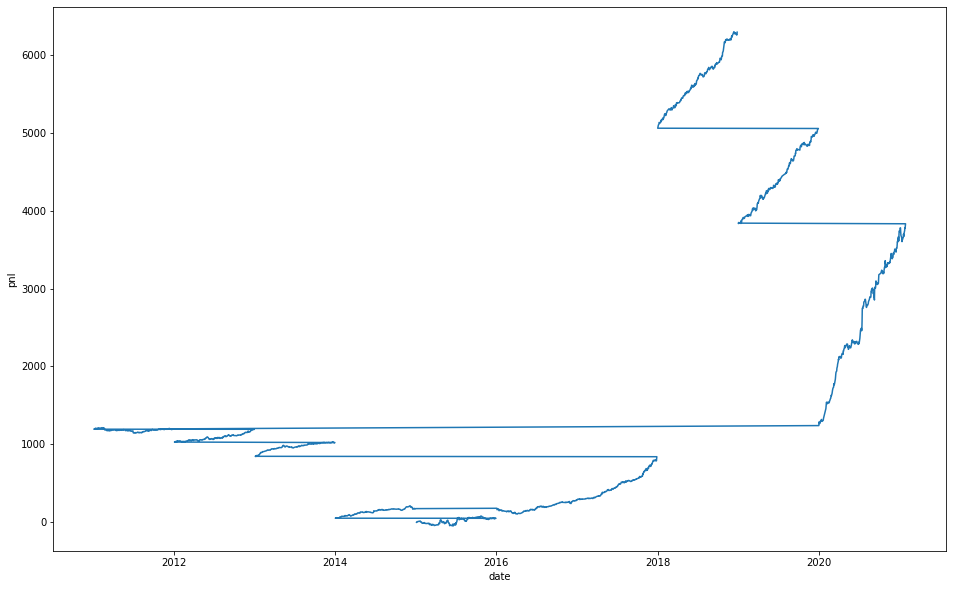

In [115]:
pd.DataFrame(get_performance(result_4,1), index=[0])

#  	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
#  	3.320091 	0.028157 	35.514767 	0.585656 	4.579918 	0.563022 	724.568143

- we can see it's much better than before.
- Keep in mind that it uses future data here so the result is not realistic
- we just want to show that this scheme is much better than the previous one
- and we would use this backtest method in the future course

In [116]:
%%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product=product_list[0], period=4096, threshold=0.002, noise=0)
result_5 = compute([delayed(f_par)(date) for date in all_dates])[0]

# Wall time: 40.9 s

CPU times: user 20.1 s, sys: 7.06 s, total: 27.2 s
Wall time: 18.3 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,6.090789,0.006768,147.756083,0.697541,2.593852,1.889284,1279.356928


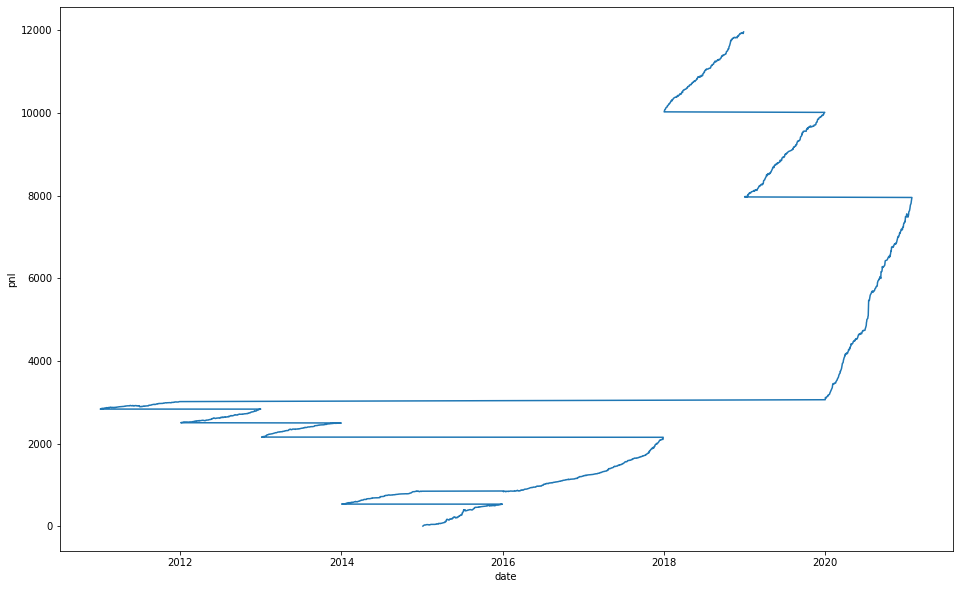

In [117]:
pd.DataFrame(get_performance(result_5,1), index=[0])

# sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 	6.090789 	0.006768 	147.756083 	0.697541 	2.593852 	1.889284 	1279.356928

- Previous method use fix size to trade, 
- now we suppose fix notional value of each trade

In [118]:
## daily pnl of fixed capital
from collections import OrderedDict
def get_daily_pnl(date, product="rb", period=2000, threshold=0.001, buy_tranct=1.5e-4,sell_tranct=11.5e-4, noise=0, notional=False):
    with gzip.open(dire+"/"+date, 'rb', compresslevel=1) as file_object:
        raw_data = file_object.read()
    data = cPickle.loads(raw_data)
    n_bar = len(data)
    unit = np.std(data["ret"])
    np.random.seed(10)
    noise_ret = np.random.normal(scale=unit*noise, size=n_bar)
    ##  we repeat the above code to get daily result
    ret_2000 = (data["ret"].rolling(period).sum()).dropna().reset_index(drop=True)
    ret_2000 = ret_2000.append(pd.Series([0]*(len(data)-len(ret_2000)))).reset_index(drop=True) + noise_ret
    signal = pd.Series([0] * n_bar)
    signal[ret_2000>threshold] = 1
    signal[ret_2000< -threshold] = -1
    position_pos = pd.Series([np.nan] * n_bar)
    position_pos[0] = 0
    position_pos[(signal==1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = 1
    position_pos[(ret_2000< -threshold) & (data["next.bid"]>0)] = 0
    position_pos.ffill(inplace=True)
    pre_pos = position_pos.shift(1)
    position_pos[(position_pos==1) & (pre_pos==1)] = np.nan ## holding positio rather than trade, change to nan
    position_pos[(position_pos==1)] = 1/data["next.ask"][(position_pos==1)] ## use 1/price as trading volume
    position_pos.ffill(inplace=True) 
    position_neg = pd.Series([np.nan] * n_bar)
    position_neg[0] = 0
    position_neg[(signal==-1) & (data["next.ask"]>0) & (data["next.bid"]>0)] = -1
    position_neg[(ret_2000> threshold) & (data["next.ask"]>0)] = 0
    position_neg.ffill(inplace=True)
    pre_neg = position_neg.shift(1)
    position_neg[(position_neg==-1) & (pre_neg==-1)] = np.nan  ## holding positio rather than trade, change to nan
    position_neg[(position_neg==-1)] = -1/data["next.bid"][(position_neg==-1)] ## use 1/price as trading volume
    position_neg.ffill(inplace=True) ## replace nan by trading volume
    position = position_pos + position_neg
    position[0]=0
    position[n_bar-1] = 0
    position[n_bar-2] = 0
    change_pos = position - position.shift(1)
    change_pos[0] = 0
    change_base = pd.Series([0] * n_bar)
    change_buy = change_pos>0
    change_sell = change_pos<0
    change_base[change_buy] = data["next.ask"][change_buy]*(1+buy_tranct)
    change_base[change_sell] = data["next.bid"][change_sell]*(1-sell_tranct)
    raw_pnl = -(change_base*change_pos).cumsum()+position*data["price"]
    date = np.array([x[0:10] for x in data["date.time"]])
    next_date = np.append(date[1:],'1')
    end_day = date!=next_date
    final_pnl = -sum(change_base*change_pos) ## total pnl, there is a negative sign, because selling get money and buying pay money
    turnover = sum(change_base*abs(change_pos))
    num = sum((position!=0) & (change_pos!=0)) ## number of trades
    hld_period = sum(position!=0)   ## holding period
    daily_pnl = raw_pnl[end_day].reset_index(drop=True)
    pnl = np.append(daily_pnl[0], np.diff(daily_pnl))
    ## finally we combine the statistics into a data frame
    #result = pd.DataFrame({"final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}, index=[0])
    #result = {"date": date, "final.pnl": final_pnl, "turnover": turnover, "num": num, "hld.period": hld_period}
    result = OrderedDict([("date", date[end_day]), ("pnl", pnl),
                          ("final.pnl", final_pnl), ("turnover", turnover), ("num", num), ("hld.period", hld_period)])
    return result

In [119]:
 %%time
import functools
with dask.config.set(scheduler='processes', num_workers=CORE_NUM):
    f_par = functools.partial(get_daily_pnl, product=product_list[0], period=4096, threshold=0.001, notional=True)
result = compute([delayed(f_par)(date) for date in all_dates])[0]
    
# Wall time: 41.8 s

CPU times: user 20.4 s, sys: 7.12 s, total: 27.6 s
Wall time: 18.4 s


,sharpe,drawdown,mar,win.ratio,num,avg.pnl,hld.period
0,3.096664,0.053227,18.7876,0.585246,4.579918,0.000836,724.568143


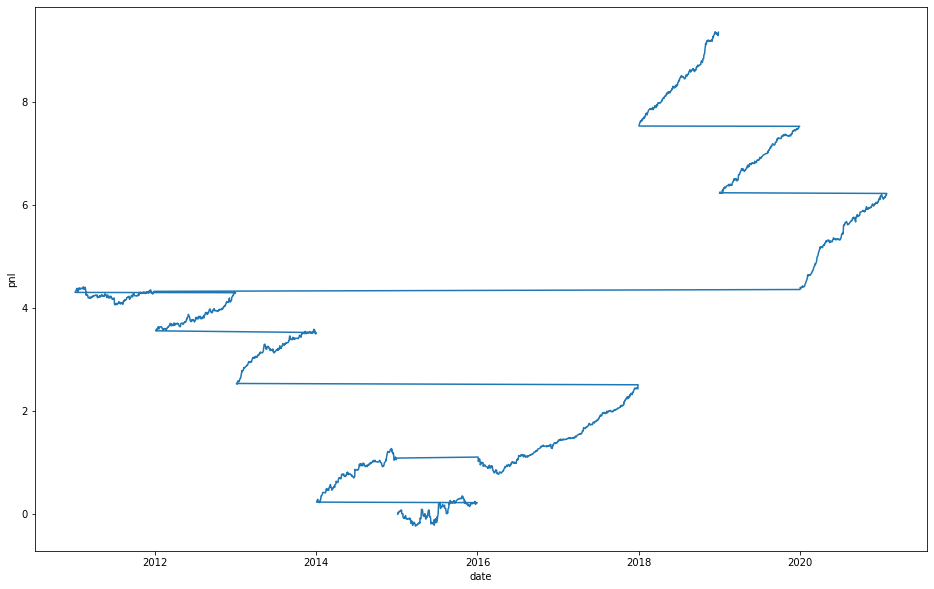

In [120]:
pd.DataFrame(get_performance(result,1), index=[0])

#  	sharpe 	drawdown 	mar 	win.ratio 	num 	avg.pnl 	hld.period
# 	3.096664 	0.047369 	21.110743 	0.585246 	4.579918 	0.000836 	724.568143

- After adding some noise, the result is worse than before but still pretty good
- the later courses we would use this backtest method to test our signals and straregies without any future data
- the reuslt would be much worse than the previous ones but they are realistic
- Homework
- You can try this method on other products and comapre their results